In [1]:
import import_ipynb
import numpy              as np      # linear algebra,
import pandas             as pd     # data processing,
import matplotlib.pyplot  as plt     # data visulation tool,
import seaborn            as sns     # data visulation
import missingno as msno
from sklearn import preprocessing 
import re 
pd.options.display.float_format = "{:.1f}".format

In [2]:
df1 = pd.read_excel('Salary Data.xlsx')
df1.head()


,Column1,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550
1,2,LeBron James,CLE,33285709
2,3,Paul Millsap,DEN,31269231
3,4,Gordon Hayward,BOS,29727900
4,5,Blake Griffin,DET,29512900


In [3]:
df2 = pd.read_excel('Season Stats.xlsx')
df2.head()

,Column1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,nan,nan,nan,...,705.0,nan,nan,nan,176.0,nan,nan,nan,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,nan,nan,nan,...,708.0,nan,nan,nan,109.0,nan,nan,nan,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,nan,nan,nan,...,698.0,nan,nan,nan,140.0,nan,nan,nan,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,nan,nan,nan,...,559.0,nan,nan,nan,20.0,nan,nan,nan,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,nan,nan,nan,...,548.0,nan,nan,nan,20.0,nan,nan,nan,27.0,59.0


In [4]:
df_merge=pd.merge(df1,df2,on='Player',how='left')# pd.merge komutuyla salary data ve season stats dosyalarımda player feature 
                                                  #ortak olduğu için player üzerinden birleştirdim left join yaptım çünkü salary
df_merge                                          #datasındaki tüm playerlar season stats da var ama season statstaki tüm player
                                                  #lar salary data da yok

,Column1_x,Player,Tm_x,season17_18,Column1_y,Year,Pos,Age,Tm_y,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Stephen Curry,GSW,34682550,20042.0,2010.0,PG,21.0,GSW,80.0,...,885.0,48.0,308.0,356.0,472.0,152.0,19.0,243.0,252.0,1399.0
1,1,Stephen Curry,GSW,34682550,20654.0,2011.0,PG,22.0,GSW,74.0,...,934.0,52.0,234.0,286.0,432.0,109.0,20.0,226.0,233.0,1373.0
2,1,Stephen Curry,GSW,34682550,21236.0,2012.0,PG,23.0,GSW,26.0,...,809.0,15.0,73.0,88.0,138.0,39.0,8.0,65.0,62.0,383.0
3,1,Stephen Curry,GSW,34682550,21798.0,2013.0,PG,24.0,GSW,78.0,...,9.0,59.0,255.0,314.0,539.0,126.0,12.0,240.0,198.0,1786.0
4,1,Stephen Curry,GSW,34682550,22402.0,2014.0,PG,25.0,GSW,78.0,...,885.0,46.0,288.0,334.0,666.0,128.0,14.0,294.0,194.0,1873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,453,Gerald Henderson,PHI,1000000,21903.0,2013.0,SG,25.0,CHA,68.0,...,824.0,55.0,195.0,250.0,177.0,68.0,34.0,108.0,149.0,1055.0
2776,453,Gerald Henderson,PHI,1000000,22521.0,2014.0,SG,26.0,CHA,77.0,...,761.0,31.0,279.0,310.0,199.0,51.0,32.0,113.0,159.0,1081.0
2777,453,Gerald Henderson,PHI,1000000,23125.0,2015.0,SG,27.0,CHO,80.0,...,848.0,36.0,237.0,273.0,206.0,51.0,22.0,110.0,135.0,969.0
2778,453,Gerald Henderson,PHI,1000000,23737.0,2016.0,SG,28.0,POR,72.0,...,767.0,30.0,181.0,211.0,75.0,39.0,19.0,68.0,87.0,624.0


In [5]:
df2017=df2[df2['Year']==2017] #salary data 2017 sezonun maaşlarını içerdiği için season statstaki sadece 2017 yılındaki istatistik
                              #üzerinden değerlendirmek istedim çünkü 2015 yılındaki istatistiğine bakarak 2017deki maaşını değerlendirmek
df2017
# doğru bir sonuca ulaştırmayabilir
  # dfpivot=df2017[df2017['Pos']=='C']
   #dfpivot.info()                         
   #dfpivot_sample = dfpivot.sample(5)


,Column1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,...,898.0,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,...,75.0,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,...,667.0,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,...,754.0,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,...,611.0,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,679.0,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,564.0,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,6.0,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,775.0,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [6]:
df_mergeLast=pd.merge(df1,df2017,on='Player',how='left') #salary dataU(df1) dataframe i ile sadece 2017 yılı istatistiği içeren df2017 dataframe ini birleştirdim
mydf=df_mergeLast
mydf

,Column1_x,Player,Tm_x,season17_18,Column1_y,Year,Pos,Age,Tm_y,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Stephen Curry,GSW,34682550,24216.0,2017.0,PG,28.0,GSW,79.0,...,898.0,61.0,292.0,353.0,523.0,143.0,17.0,239.0,183.0,1999.0
1,2,LeBron James,CLE,33285709,24365.0,2017.0,SF,32.0,CLE,74.0,...,674.0,97.0,543.0,640.0,646.0,92.0,44.0,303.0,134.0,1954.0
2,3,Paul Millsap,DEN,31269231,24467.0,2017.0,PF,31.0,ATL,69.0,...,768.0,111.0,422.0,533.0,252.0,90.0,62.0,158.0,186.0,1246.0
3,4,Gordon Hayward,BOS,29727900,24321.0,2017.0,SF,26.0,UTA,73.0,...,844.0,49.0,344.0,393.0,252.0,73.0,20.0,140.0,117.0,1601.0
4,5,Blake Griffin,DET,29512900,24302.0,2017.0,PF,27.0,LAC,61.0,...,76.0,111.0,385.0,496.0,300.0,58.0,23.0,142.0,157.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,449,Isaiah Canaan,PHO,1069308,24181.0,2017.0,SG,25.0,CHI,39.0,...,909.0,6.0,43.0,49.0,37.0,22.0,1.0,20.0,35.0,181.0
513,450,Wesley Iwundu,ORL,1050000,nan,nan,NaN,nan,NaN,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
514,451,Livio Jean-Charles,SAS,1035200,nan,nan,NaN,nan,NaN,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
515,452,Justin Hamilton,TOR,1000000,24303.0,2017.0,C,26.0,BRK,64.0,...,75.0,71.0,191.0,262.0,55.0,29.0,43.0,43.0,91.0,442.0


In [7]:
mydf.info()
mydf.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Column1_x    517 non-null    int64  
 1   Player       517 non-null    object 
 2   Tm_x         517 non-null    object 
 3   season17_18  517 non-null    int64  
 4   Column1_y    459 non-null    float64
 5   Year         459 non-null    float64
 6   Pos          459 non-null    object 
 7   Age          459 non-null    float64
 8   Tm_y         459 non-null    object 
 9   G            459 non-null    float64
 10  GS           459 non-null    float64
 11  MP           459 non-null    float64
 12  PER          459 non-null    float64
 13  TS%          458 non-null    float64
 14  3PAr         458 non-null    float64
 15  FTr          458 non-null    float64
 16  ORB%         459 non-null    float64
 17  DRB%         459 non-null    float64
 18  TRB%         459 non-null    float64
 19  AST%    

(517, 56)

In [8]:
mydfclear=mydf[['Player','Tm_x','season17_18','Year','Pos','Age','PER','TRB','AST','STL','PTS','MP','GS','DRB','ORB']] # benim df im sadece bu değişkenlerden olsun istiyorum 
mydfclear

,Player,Tm_x,season17_18,Year,Pos,Age,PER,TRB,AST,STL,PTS,MP,GS,DRB,ORB
0,Stephen Curry,GSW,34682550,2017.0,PG,28.0,24.6,353.0,523.0,143.0,1999.0,2638.0,79.0,292.0,61.0
1,LeBron James,CLE,33285709,2017.0,SF,32.0,27.0,640.0,646.0,92.0,1954.0,2794.0,74.0,543.0,97.0
2,Paul Millsap,DEN,31269231,2017.0,PF,31.0,17.8,533.0,252.0,90.0,1246.0,2343.0,67.0,422.0,111.0
3,Gordon Hayward,BOS,29727900,2017.0,SF,26.0,22.2,393.0,252.0,73.0,1601.0,2516.0,73.0,344.0,49.0
4,Blake Griffin,DET,29512900,2017.0,PF,27.0,22.7,496.0,300.0,58.0,1316.0,2076.0,61.0,385.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Isaiah Canaan,PHO,1069308,2017.0,SG,25.0,8.1,49.0,37.0,22.0,181.0,592.0,0.0,43.0,6.0
513,Wesley Iwundu,ORL,1050000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
514,Livio Jean-Charles,SAS,1035200,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
515,Justin Hamilton,TOR,1000000,2017.0,C,26.0,13.6,262.0,55.0,29.0,442.0,1177.0,7.0,191.0,71.0


In [9]:
mydfclear.info()
mydfclear

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       517 non-null    object 
 1   Tm_x         517 non-null    object 
 2   season17_18  517 non-null    int64  
 3   Year         459 non-null    float64
 4   Pos          459 non-null    object 
 5   Age          459 non-null    float64
 6   PER          459 non-null    float64
 7   TRB          459 non-null    float64
 8   AST          459 non-null    float64
 9   STL          459 non-null    float64
 10  PTS          459 non-null    float64
 11  MP           459 non-null    float64
 12  GS           459 non-null    float64
 13  DRB          459 non-null    float64
 14  ORB          459 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 64.6+ KB


,Player,Tm_x,season17_18,Year,Pos,Age,PER,TRB,AST,STL,PTS,MP,GS,DRB,ORB
0,Stephen Curry,GSW,34682550,2017.0,PG,28.0,24.6,353.0,523.0,143.0,1999.0,2638.0,79.0,292.0,61.0
1,LeBron James,CLE,33285709,2017.0,SF,32.0,27.0,640.0,646.0,92.0,1954.0,2794.0,74.0,543.0,97.0
2,Paul Millsap,DEN,31269231,2017.0,PF,31.0,17.8,533.0,252.0,90.0,1246.0,2343.0,67.0,422.0,111.0
3,Gordon Hayward,BOS,29727900,2017.0,SF,26.0,22.2,393.0,252.0,73.0,1601.0,2516.0,73.0,344.0,49.0
4,Blake Griffin,DET,29512900,2017.0,PF,27.0,22.7,496.0,300.0,58.0,1316.0,2076.0,61.0,385.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Isaiah Canaan,PHO,1069308,2017.0,SG,25.0,8.1,49.0,37.0,22.0,181.0,592.0,0.0,43.0,6.0
513,Wesley Iwundu,ORL,1050000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
514,Livio Jean-Charles,SAS,1035200,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
515,Justin Hamilton,TOR,1000000,2017.0,C,26.0,13.6,262.0,55.0,29.0,442.0,1177.0,7.0,191.0,71.0


In [10]:
testdf = mydfclear.copy()
testdf.dropna(how = 'any' , inplace=True)  # * 'any' : If any NA values are present, drop that row or column.
                                           # bazı oyuncuların sadece ismi ve takım bilgisi vardı diğer değikenleri null dı 
                                           #bu oyuncuları sildik çünkü modelin içerisine null ve object data tipini train edemiyoruz
testdf

testdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 516
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       459 non-null    object 
 1   Tm_x         459 non-null    object 
 2   season17_18  459 non-null    int64  
 3   Year         459 non-null    float64
 4   Pos          459 non-null    object 
 5   Age          459 non-null    float64
 6   PER          459 non-null    float64
 7   TRB          459 non-null    float64
 8   AST          459 non-null    float64
 9   STL          459 non-null    float64
 10  PTS          459 non-null    float64
 11  MP           459 non-null    float64
 12  GS           459 non-null    float64
 13  DRB          459 non-null    float64
 14  ORB          459 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 57.4+ KB


In [11]:
testdf.describe().T

,count,mean,std,min,25%,50%,75%,max
season17_18,459.0,7108149.7,7176686.4,1000000.0,1787700.0,4078320.0,10081461.0,34682550.0
Year,459.0,2017.0,0.0,2017.0,2017.0,2017.0,2017.0,2017.0
Age,459.0,26.3,4.3,19.0,23.0,26.0,29.0,40.0
PER,459.0,13.4,5.5,-35.3,10.1,13.0,16.1,30.6
TRB,459.0,230.1,195.3,0.0,92.5,189.0,306.5,1116.0
AST,459.0,118.3,132.3,0.0,34.0,75.0,155.5,906.0
STL,459.0,41.0,32.2,0.0,16.0,35.0,58.0,157.0
PTS,459.0,558.7,477.5,0.0,183.0,445.0,796.0,2558.0
MP,459.0,1274.4,804.6,1.0,560.0,1237.0,1940.5,3048.0
GS,459.0,25.9,28.1,0.0,1.0,13.0,50.0,82.0


In [12]:
testdf.groupby(["Player"]).mean().T

Player,A.J. Hammons,Aaron Brooks,Aaron Gordon,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Williams,Alec Burks,Alex Abrines,Alex Len,...,Wesley Matthews,Will Barton,Willie Cauley-Stein,Willie Reed,Willy Hernangomez,Wilson Chandler,Yogi Ferrell,Zach LaVine,Zach Randolph,Zaza Pachulia
season17_18,1312611.0,2116955.0,5504420.0,27734405.0,9769821.0,7319035.0,6000000.0,10845506.0,5725000.0,4187599.0,...,17884176.0,3533333.0,3704160.0,1577230.0,1435750.0,12016854.0,1312611.0,3202217.0,12307692.0,3477600.0
Year,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,...,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
Age,24.0,32.0,21.0,30.0,32.0,26.0,24.0,25.0,23.0,23.0,...,30.0,26.0,23.0,26.0,22.0,29.0,23.0,21.0,35.0,32.0
PER,8.4,9.5,14.4,17.7,18.9,11.3,19.5,11.6,10.1,15.0,...,11.9,15.5,16.4,17.1,18.9,14.9,11.2,14.6,18.5,16.1
TRB,36.0,69.0,405.0,464.0,278.0,451.0,292.0,120.0,86.0,510.0,...,259.0,258.0,340.0,332.0,502.0,459.0,74.0,159.0,598.0,410.0
AST,4.0,125.0,150.0,337.0,57.0,99.0,23.0,30.0,40.0,44.0,...,210.0,206.0,80.0,26.0,96.0,141.0,114.7,139.0,122.0,132.0
STL,1.0,25.0,64.0,52.0,19.0,60.0,27.0,18.0,37.0,37.0,...,77.0,48.0,53.0,18.0,41.0,52.0,28.0,41.0,38.0,59.0
PTS,48.0,322.0,1019.0,952.0,535.0,532.0,346.0,283.0,406.0,613.0,...,986.0,820.0,611.0,374.0,587.0,1117.0,308.0,889.0,1028.0,426.0
MP,163.0,894.0,2298.0,2193.0,931.0,1773.0,708.0,653.0,1055.0,1560.0,...,2495.0,1705.0,1421.0,1031.0,1324.0,2197.0,798.0,1749.0,1786.0,1268.0
GS,0.0,0.0,72.0,68.0,1.0,25.0,0.0,0.0,6.0,34.0,...,73.0,19.0,21.0,5.0,22.0,33.0,19.3,47.0,5.0,70.0


In [13]:
testdf.groupby(['Pos']).describe()["season17_18"]# pozisyonuna göre mmaş bilgisi





,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,8188805.3,7436198.2,1000000.0,2328652.0,4961798.0,13285554.5,27734405.0
PF,84.0,6932816.6,6970652.9,1312611.0,1709538.0,4309021.0,9928371.2,31269231.0
PF-C,1.0,1524305.0,nan,1524305.0,1524305.0,1524305.0,1524305.0,1524305.0
PG,86.0,6910650.0,8230873.3,1312611.0,1554528.8,2850000.0,7104166.8,34682550.0
SF,100.0,7238049.2,7147501.0,1096080.0,2063319.8,3686657.0,10500000.0,33285709.0
SG,93.0,6265618.2,6013072.0,1000000.0,1700640.0,4180000.0,8000000.0,27739975.0


Pos
C      8188805.3
PF     6932816.6
PF-C   1524305.0
PG     6910650.0
SF     7238049.2
SG     6265618.2
Name: season17_18, dtype: float64

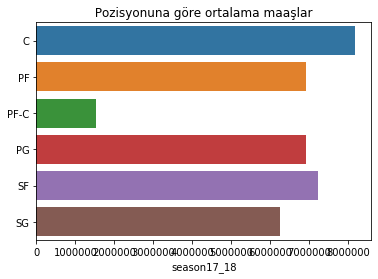

In [14]:
data1 = testdf.groupby('Pos')["season17_18"].mean()

Pos = ['C','PF','PF-C','PG','SF','SG']
sns.barplot(data1,Pos)
plt.title(" Pozisyonuna göre ortalama maaşlar ")
data1

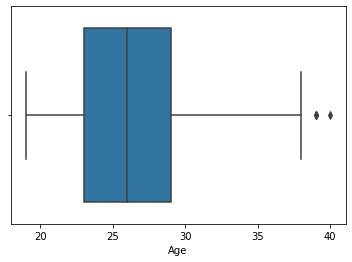

In [15]:
sns.boxplot(x=testdf["Age"]); # ortalama yaş

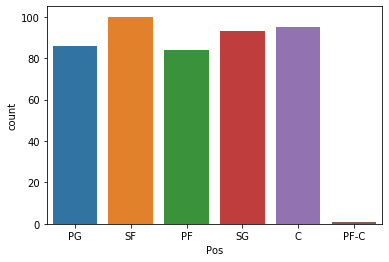

In [16]:
sns.countplot(testdf['Pos'])# hangi pozisyondan kaç oyuncu var var

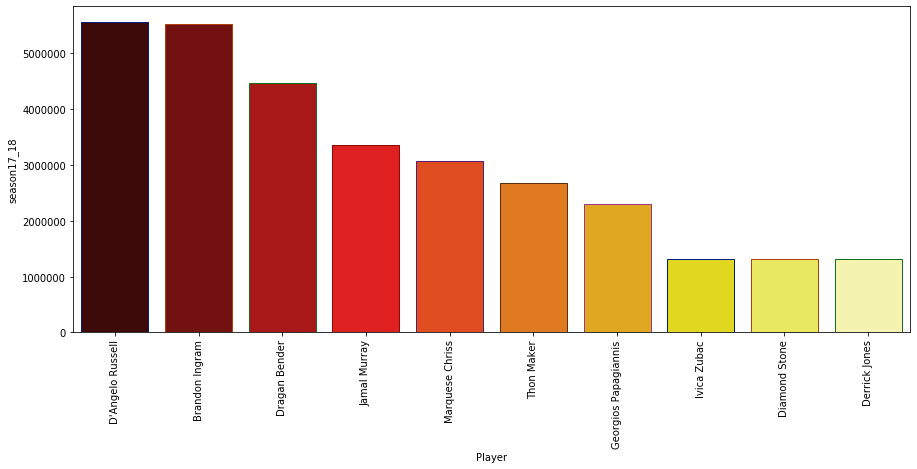

In [17]:
df_Age_Salary=testdf.nsmallest(10,'Age').sort_values('season17_18',ascending=False) # en genç ve en yüksek maaşa sahip 10 oyuncu
plt.subplots(figsize=(15,6))

sns.barplot(x="Player",y="season17_18",data=df_Age_Salary,palette="hot",edgecolor=sns.color_palette("dark",7))
plt.xticks(rotation=90)
plt.show()

In [18]:
testdf.groupby(["Pos"]).describe()["PTS"] # pozisyonuna göre attığı sayılar


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,542.0,469.9,0.0,183.0,426.0,828.5,2099.0
PF,84.0,473.5,397.3,1.0,105.2,375.5,770.8,1518.0
PF-C,1.0,375.0,nan,375.0,375.0,375.0,375.0,375.0
PG,86.0,605.0,587.7,3.0,152.5,434.5,811.5,2558.0
SF,100.0,554.6,467.4,12.0,201.2,440.5,721.2,1954.0
SG,93.0,616.1,447.6,8.0,283.0,567.0,845.0,2020.0


Pos
C      542.0
PF     473.5
PF-C   375.0
PG     605.0
SF     554.6
SG     616.1
Name: PTS, dtype: float64

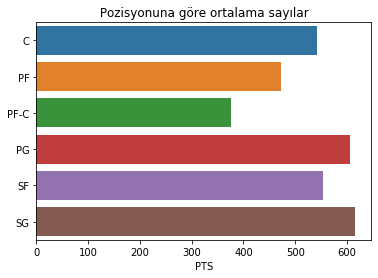

In [19]:
data2 = testdf.groupby('Pos')["PTS"].mean()
#data.groupby('position_cat')["market_value"].mean()
Pos = ['C','PF','PF-C','PG','SF','SG']
sns.barplot(data2,Pos)
plt.title(" Pozisyonuna göre ortalama sayılar ")
data2

In [20]:
testdf.groupby(["Pos"]).describe()["AST"] # pozisyonuna göre yaptığı sayılar

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,78.4,82.2,0.0,22.0,57.0,96.5,359.0
PF,84.0,72.2,82.3,0.0,16.5,57.5,97.0,533.0
PF-C,1.0,70.0,nan,70.0,70.0,70.0,70.0,70.0
PG,86.0,230.1,207.3,3.0,57.2,186.5,378.8,906.0
SF,100.0,95.9,97.2,0.0,36.0,71.0,126.2,646.0
SG,93.0,121.9,91.7,0.0,54.0,98.0,183.0,455.0


Pos
C       78.4
PF      72.2
PF-C    70.0
PG     230.1
SF      95.9
SG     121.9
Name: AST, dtype: float64

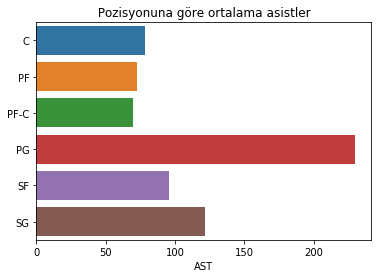

In [21]:
data3 = testdf.groupby('Pos')["AST"].mean()
#data.groupby('position_cat')["market_value"].mean()
Pos = ['C','PF','PF-C','PG','SF','SG']
sns.barplot(data3,Pos)
plt.title(" Pozisyonuna göre ortalama asistler ")
data3

In [22]:
testdf.groupby(["Pos"]).describe()["TRB"]  # pozisyonuna göre aldığı toplam ribaundlar

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,355.0,275.4,0.0,158.5,292.0,488.5,1116.0
PF,84.0,250.3,192.4,2.0,77.0,223.0,389.5,666.0
PF-C,1.0,251.0,nan,251.0,251.0,251.0,251.0,251.0
PG,86.0,155.2,141.4,0.0,45.2,130.0,225.8,864.0
SF,100.0,220.9,149.9,2.0,94.8,200.5,309.5,700.0
SG,93.0,163.3,99.6,5.0,98.0,159.0,226.0,481.0


Pos
C      355.0
PF     250.3
PF-C   251.0
PG     155.2
SF     220.9
SG     163.3
Name: TRB, dtype: float64

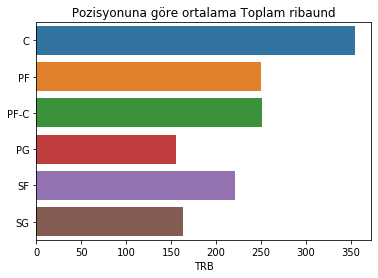

In [23]:
data4 = testdf.groupby('Pos')["TRB"].mean()
#data.groupby('position_cat')["market_value"].mean()
Pos = ['C','PF','PF-C','PG','SF','SG']
sns.barplot(data4,Pos)
plt.title(" Pozisyonuna göre ortalama Toplam ribaund ")
data4

In [24]:
testdf.groupby(["Pos"]).describe()["PER"]  # pozisyonuna göre verimlilikleri

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,15.9,7.6,-35.3,13.1,16.1,20.1,29.6
PF,84.0,13.3,4.7,-1.4,10.6,13.7,16.6,26.1
PF-C,1.0,12.6,nan,12.6,12.6,12.6,12.6,12.6
PG,86.0,13.3,5.7,0.3,9.7,12.6,15.4,30.6
SF,100.0,12.1,4.4,3.3,9.5,11.5,14.0,27.5
SG,93.0,12.2,3.6,5.9,9.8,12.0,13.7,24.0


In [25]:
testdf.groupby(["Pos"]).describe()["STL"]  # pozisyonuna göre top çalma istatistikleri

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,34.4,26.0,0.0,16.5,30.0,50.0,124.0
PF,84.0,31.5,29.0,0.0,10.0,26.0,46.2,154.0
PF-C,1.0,25.0,nan,25.0,25.0,25.0,25.0,25.0
PG,86.0,47.8,38.2,0.0,17.2,42.0,69.5,157.0
SF,100.0,46.1,35.2,0.0,20.8,36.5,61.8,147.0
SG,93.0,44.7,28.8,0.0,21.0,45.0,66.0,125.0


In [26]:
testdf.groupby(["Pos"]).describe()["Age"]   # pozisyonuna göre yaş bilgisi



,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,95.0,25.9,4.1,19.0,23.0,26.0,28.0,36.0
PF,84.0,25.9,3.9,19.0,22.8,27.0,28.0,38.0
PF-C,1.0,25.0,nan,25.0,25.0,25.0,25.0,25.0
PG,86.0,26.4,4.3,20.0,23.0,26.0,30.0,35.0
SF,100.0,26.7,4.8,19.0,22.8,26.0,29.2,40.0
SG,93.0,26.5,4.5,19.0,23.0,25.0,29.0,39.0


Pos
C      25.9
PF     25.9
PF-C   25.0
PG     26.4
SF     26.7
SG     26.5
Name: Age, dtype: float64

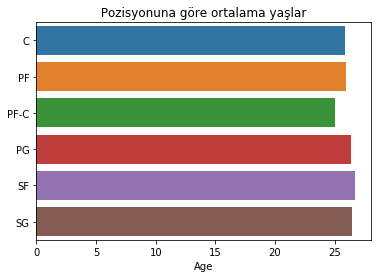

In [27]:
data5 = testdf.groupby('Pos')["Age"].mean()
#data.groupby('position_cat')["market_value"].mean()
Pos = ['C','PF','PF-C','PG','SF','SG']
sns.barplot(data5,Pos)
plt.title(" Pozisyonuna göre ortalama yaşlar ")
data5

In [28]:
testdf.corr() # değişkenlerin birbirlerine göre olan ilişkileri

,season17_18,Year,Age,PER,TRB,AST,STL,PTS,MP,GS,DRB,ORB
season17_18,1.0,nan,0.2,0.5,0.6,0.5,0.5,0.7,0.6,0.6,0.6,0.4
Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Age,0.2,nan,1.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.1,-0.0
PER,0.5,nan,0.0,1.0,0.6,0.5,0.5,0.6,0.5,0.4,0.6,0.5
TRB,0.6,nan,0.0,0.6,1.0,0.4,0.6,0.7,0.8,0.7,1.0,0.9
AST,0.5,nan,0.1,0.5,0.4,1.0,0.7,0.7,0.7,0.6,0.5,0.2
STL,0.5,nan,0.1,0.5,0.6,0.7,1.0,0.7,0.8,0.7,0.7,0.4
PTS,0.7,nan,0.1,0.6,0.7,0.7,0.7,1.0,0.9,0.8,0.7,0.5
MP,0.6,nan,0.1,0.5,0.8,0.7,0.8,0.9,1.0,0.8,0.8,0.6
GS,0.6,nan,0.0,0.4,0.7,0.6,0.7,0.8,0.8,1.0,0.7,0.6


In [29]:
testdf = pd.get_dummies(testdf, columns=['Pos']) # pozisyon Object bir değişken olduğu için get dummy uygulayıp veri tipini uygun hale  modele train etmek için uygun hale getirdim


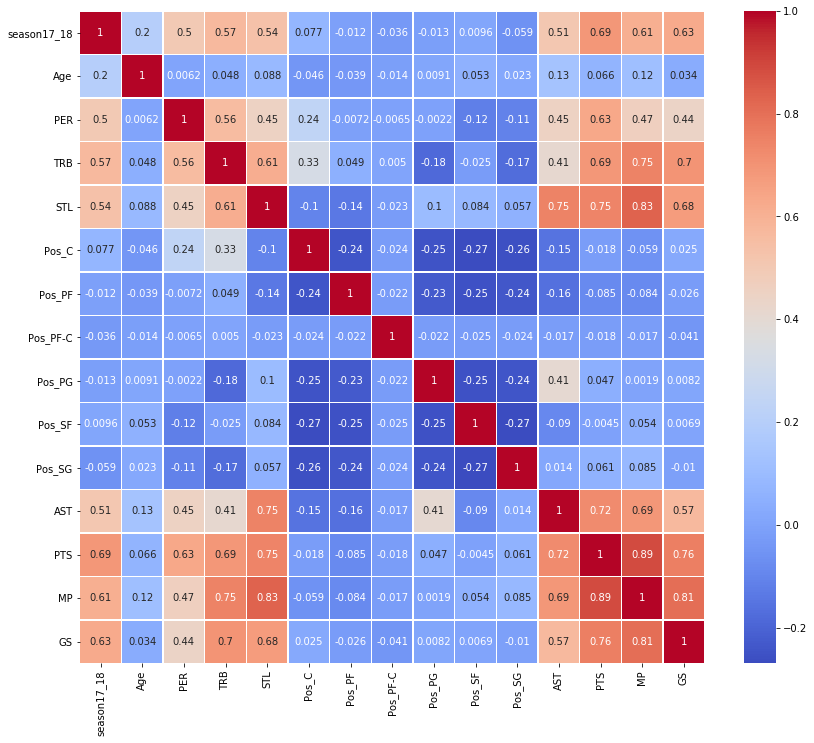

In [30]:
corr_columns=['season17_18','Age','PER','TRB','STL','Pos_C','Pos_PF','Pos_PF-C','Pos_PG','Pos_SF','Pos_SG','AST','PTS','MP','GS']

corr_mtrx=testdf[corr_columns].corr() # değişkenlerin birbirleriyle olan ilişkisini görüntüledik

plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

Model Train test split

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()


In [32]:
X = testdf.loc[:,['Age','PER','TRB','STL','AST','PTS','Pos_C','Pos_PF','Pos_PF-C','Pos_PG','Pos_SF','Pos_SG','MP','GS','DRB','ORB']] # modele gireceğim datalara x tahmin edeceğim salary e y dedim

y = testdf['season17_18']

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 516
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       459 non-null    float64
 1   PER       459 non-null    float64
 2   TRB       459 non-null    float64
 3   STL       459 non-null    float64
 4   AST       459 non-null    float64
 5   PTS       459 non-null    float64
 6   Pos_C     459 non-null    uint8  
 7   Pos_PF    459 non-null    uint8  
 8   Pos_PF-C  459 non-null    uint8  
 9   Pos_PG    459 non-null    uint8  
 10  Pos_SF    459 non-null    uint8  
 11  Pos_SG    459 non-null    uint8  
 12  MP        459 non-null    float64
 13  GS        459 non-null    float64
 14  DRB       459 non-null    float64
 15  ORB       459 non-null    float64
dtypes: float64(10), uint8(6)
memory usage: 62.1 KB


In [34]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)
"""Train -Test %80 e %20  olarak ayrıldı.
Train de kullanılan % 8o lık data ile modelimizi eğitip kalan % 20 lik kısım üzerinden test ettik
% 80 lik kısım 367 kayıt sayısına  %20 lik kısım 92  kayıt sayısına denk geliyor
Dolayısıyla biz burada yüzde 20 lik yani 92 oyuncu üzerinden testimizi yaptık. 
"""
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 118 to 283
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       367 non-null    float64
 1   PER       367 non-null    float64
 2   TRB       367 non-null    float64
 3   STL       367 non-null    float64
 4   AST       367 non-null    float64
 5   PTS       367 non-null    float64
 6   Pos_C     367 non-null    uint8  
 7   Pos_PF    367 non-null    uint8  
 8   Pos_PF-C  367 non-null    uint8  
 9   Pos_PG    367 non-null    uint8  
 10  Pos_SF    367 non-null    uint8  
 11  Pos_SG    367 non-null    uint8  
 12  MP        367 non-null    float64
 13  GS        367 non-null    float64
 14  DRB       367 non-null    float64
 15  ORB       367 non-null    float64
dtypes: float64(10), uint8(6)
memory usage: 33.7 KB


In [35]:
#Modelimizi eğitebiliriz.
#x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)
lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına baktım
mse = np.mean((pred - y_cv)**2)

#modelin score r2S

lreg.score(x_cv, y_cv)


0.486626921550403

In [36]:
# Katsayılara bir göz atalım(Yani denklemdeki datalarımız)
from pandas import Series, DataFrame
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff
lreg.coef_

array([ 2.77343485e+05,  4.20762950e+04,  1.43941243e+03,  2.82676356e+04,
       -1.44397345e+02,  1.02469743e+04,  8.72965236e+05,  9.76270733e+05,
       -1.84014663e+06, -1.39847969e+05,  5.29994649e+05, -3.99236016e+05,
       -3.57394287e+03,  7.49760947e+04,  2.28881013e+03, -8.49397700e+02])

In [37]:
mse
coeff

,0,Coefficient Estimate
0,Age,277343.5
1,PER,42076.3
2,TRB,1439.4
3,STL,28267.6
4,AST,-144.4
5,PTS,10247.0
6,Pos_C,872965.2
7,Pos_PF,976270.7
8,Pos_PF-C,-1840146.6
9,Pos_PG,-139848.0


In [39]:


#Modelimizi eğitebiliriz.
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına baktım
mse = np.mean((pred - y_cv)**2)

#modelin score r2S

lreg.score(x_cv, y_cv)





0.486626921550403